In [1]:
import pandas as pd

In [13]:
voice1 = pd.read_csv('Training Model/Voice1.csv')
voice2 = pd.read_csv('Training Model/Voice2.csv')

In [3]:
#normalise 
from sklearn import preprocessing
import numpy as np

columns_to_normalize = ['Jitter (local, absolute)', 'Jitter (rap)', 'Jitter (ppq5)',
       'Jitter (ddp)', 'Shimmer (local)', 'Shimmer (local,dB)',
       'Shimmer (apq3)', 'Shimmer (apq5)', 'Shimmer (apq11)', 'Shimmer (dda)',
       'Noise to harmonics', 'Harmonics to noise']
scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
normalized_columns_voice1 = scaler.fit_transform(voice1[columns_to_normalize])
normalized_columns_voice2 = scaler.fit_transform(voice2[columns_to_normalize])


In [4]:
df_normalized_voice1 = pd.DataFrame(normalized_columns_voice1, columns=columns_to_normalize)
df_normalized_voice2 = pd.DataFrame(normalized_columns_voice2, columns=columns_to_normalize)
normalized = pd.concat([df_normalized_voice1, df_normalized_voice2])

UPDRS_voice1 = voice1.iloc[:, 0]  # Assuming the first column's index is 0
UPDRS_voice2 = voice2.iloc[:, 0]
UPDRS_column = pd.concat([UPDRS_voice1, UPDRS_voice2], axis=0)

#add UPDRS column to normalised data
concatenated_df = pd.concat([UPDRS_column, normalized], axis=1)
concatenated_df.reset_index(drop=True, inplace=True)

print(concatenated_df)

       UPDRS  Jitter (local, absolute)  Jitter (rap)  Jitter (ppq5)  \
0     23.000                 -0.782582     -0.789288      -0.894064   
1     23.000                 -0.918965     -0.926829      -0.956170   
2     23.000                 -0.824581     -0.831531      -0.912488   
3     23.000                 -0.697890     -0.724918      -0.769259   
4     23.000                 -0.583354     -0.584360      -0.783374   
...      ...                       ...           ...            ...   
6910  33.485                 -0.869852     -0.953155      -0.963836   
6911  32.988                 -0.898723     -0.969935      -0.969912   
6912  32.495                 -0.898723     -0.958399      -0.958339   
6913  32.007                 -0.918573     -0.966789      -0.968755   
6914  31.513                 -0.914964     -0.964342      -0.964415   

      Jitter (ddp)  Shimmer (local)  Shimmer (local,dB)  Shimmer (apq3)  \
0        -0.789297        -0.642121           -0.483575       -0.682436 

In [5]:
from sklearn.model_selection import train_test_split

Y = concatenated_df['UPDRS']
X = concatenated_df.drop(columns=['UPDRS'])  # Remove the target column from the features

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

svr_clf_linear = Pipeline([
    ('scaler', StandardScaler()),  
    ('svr', SVR(kernel='linear',  C=100, gamma="auto"))  
])
svr_clf_linear.fit(X, Y)
Y_pred_linear = svr_clf_linear.predict(X)

perf = svr_clf_linear.score(X, Y)  
print("Linear Kernel R-squared: %0.4f" % perf)
rmse = np.sqrt(mean_squared_error(Y, Y_pred_linear))
print("Linear Kernel RMSE: %0.4f" % rmse)

Linear Kernel R-squared: 0.1570
Linear Kernel RMSE: 11.9012


In [7]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)

svr_rbf.fit(X,Y)
Y_pred_rbf = svr_rbf.predict(X)

perf = svr_rbf.score(X, Y)  
print("RBF Kernel R-squared: %0.4f" % perf)
rmse = np.sqrt(mean_squared_error(Y, Y_pred_rbf))
print("RBF Kernel RMSE: %0.4f" % rmse)

RBF Kernel R-squared: 0.2089
RBF Kernel RMSE: 11.5286


In [8]:
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

svr_poly.fit(X,Y)
Y_pred_poly = svr_poly.predict(X)

perf = svr_poly.score(X, Y)  
print("Poly Kernel R-squared: %0.4f" % perf)
rmse = np.sqrt(mean_squared_error(Y, Y_pred_poly))
print("Poly Kernel RMSE: %0.4f" % rmse)

Poly Kernel R-squared: 0.2056
Poly Kernel RMSE: 11.5530


In [9]:
from sklearn.svm import SVR
import numpy as np
from sklearn.metrics import mean_squared_error

# Generate or load your data (X and Y)

step = 0.1

for weight_rbf in np.arange(0.1, 1.0, step): 
    weight_poly = 1-weight_rbf  # Weight for the polynomial kernel
    
    Y_pred_combined = (weight_rbf * Y_pred_rbf) + (weight_poly * Y_pred_poly)
    perf_combined = svr_rbf.score(X, Y)  # You can use svr_rbf or svr_poly for scoring
    print("Linear Combi weight rbf= %0.1f" %weight_rbf)
    print ("R-squared: %0.4f" % perf_combined)
    rmse_combined = np.sqrt(mean_squared_error(Y, Y_pred_combined))
    print("RMSE: %0.4f" % rmse_combined)



Linear Combi weight rbf= 0.1
R-squared: 0.2089
RMSE: 11.5490
Linear Combi weight rbf= 0.2
R-squared: 0.2089
RMSE: 11.5453
Linear Combi weight rbf= 0.3
R-squared: 0.2089
RMSE: 11.5420
Linear Combi weight rbf= 0.4
R-squared: 0.2089
RMSE: 11.5391
Linear Combi weight rbf= 0.5
R-squared: 0.2089
RMSE: 11.5364
Linear Combi weight rbf= 0.6
R-squared: 0.2089
RMSE: 11.5342
Linear Combi weight rbf= 0.7
R-squared: 0.2089
RMSE: 11.5323
Linear Combi weight rbf= 0.8
R-squared: 0.2089
RMSE: 11.5307
Linear Combi weight rbf= 0.9
R-squared: 0.2089
RMSE: 11.5295


In [10]:
Y_pred_product = Y_pred_rbf * Y_pred_poly

# Calculate performance metrics for the combined model
rmse_product = np.sqrt(mean_squared_error(Y, Y_pred_combined))

print("RBF Poly product RMSE: %0.4f" % rmse_product)

RBF Poly product RMSE: 11.5295


In [11]:
svr_sigmoid = SVR(kernel="sigmoid", C=100, gamma="auto", coef0=1)

svr_sigmoid.fit(X,Y)
Y_pred_sigmoid = svr_sigmoid.predict(X)

perf = svr_sigmoid.score(X, Y)  
print("Sigmoid Kernel R-squared: %0.4f" % perf)
rmse = np.sqrt(mean_squared_error(Y, Y_pred_sigmoid))
print("Sigmoid Kernel RMSE: %0.4f" % rmse)

Sigmoid Kernel R-squared: -2588.4660
Sigmoid Kernel RMSE: 659.5853


In [ ]:
Y_pred_product = Y_pred_rbf * Y_pred_poly


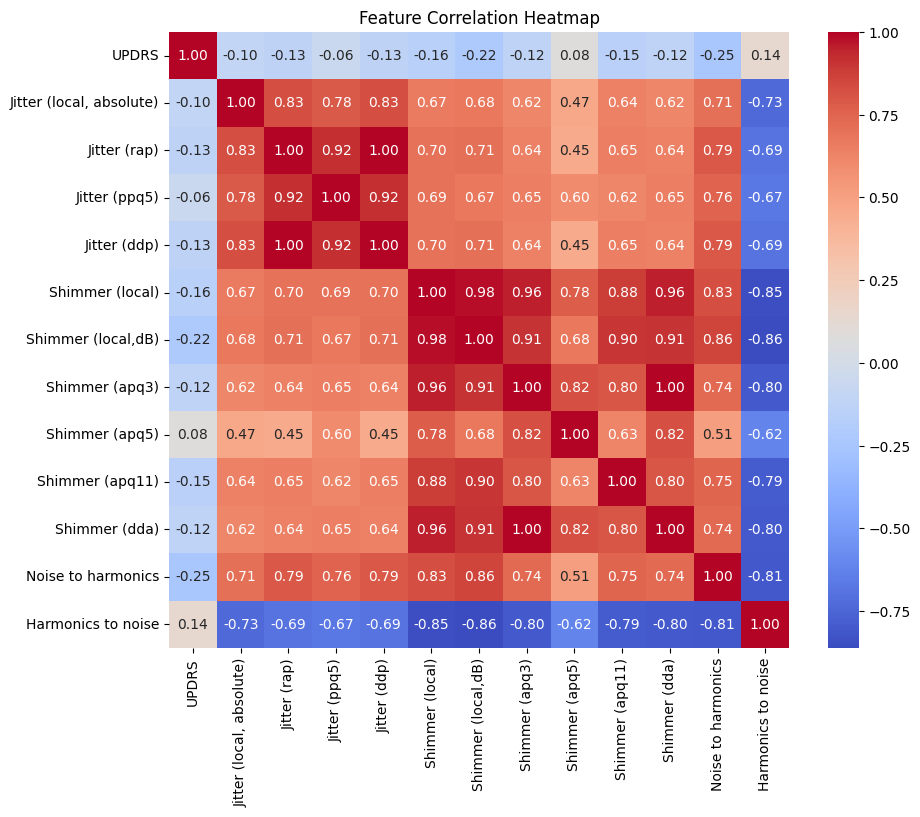

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = concatenated_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()